# Inventories comparisons

import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
import numpy as npAll values here are in Tg

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# all values are in alphabetical order: CO, NH3, NOx, SO2

#From our dataset of CMIP6 2017 road emission flux data, integrated on earth area
cmip6_earth = [145.59, 0.39, 43.25, 3.21]

# From our dataset of CMIP6 2017 road emission flux data, but naive average
cmip6_naive =  [111.4, 0.32, 33.9, 2.47]

# CEDS, transportation, 2017 (2014 for NOx)
ceds = [12.2, 0.0141, 2.17, 0.260]

 # EDGAR, anthro, 2012, Road Transportation
edgar = [184.0, 0.513, 20.3, 0.785 ]

# ECLIPSE, anthro, Transportation, 2020
eclipse = [123.0, 0.455, 23.2, 1.29]

species = ("CO", "NH3", "NOx", "SO2")

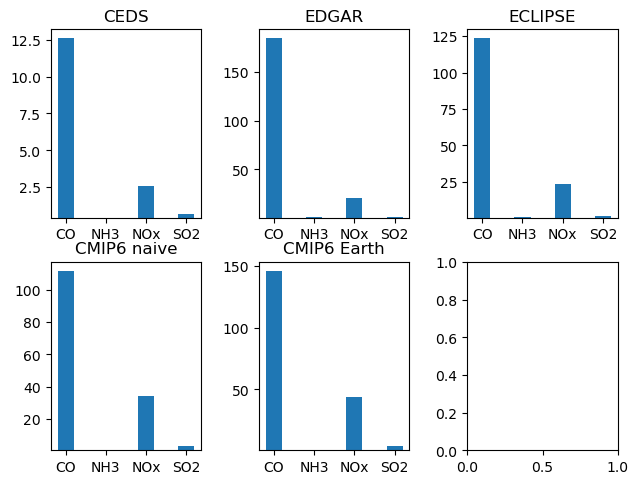

In [5]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3)
fig.tight_layout()


X_axis_species = np.arange(len(species))
width_big = 0.4


ax1.set_title('CEDS')
ax1.bar(X_axis_species , ceds, width_big, 0.4)
ax1.set_xticks(X_axis_species, species)

ax2.set_title('EDGAR')
ax2.bar(X_axis_species , edgar, width_big, 0.4)
ax2.set_xticks(X_axis_species, species)

ax3.set_title('ECLIPSE')
ax3.bar(X_axis_species , eclipse, width_big, 0.4)
ax3.set_xticks(X_axis_species, species)

ax4.set_title('CMIP6 naive')
ax4.bar(X_axis_species , cmip6_naive, width_big, 0.4)
ax4.set_xticks(X_axis_species, species)

ax5.set_title('CMIP6 Earth')
ax5.bar(X_axis_species , cmip6_earth, width_big, 0.4)
ax5.set_xticks(X_axis_species, species)

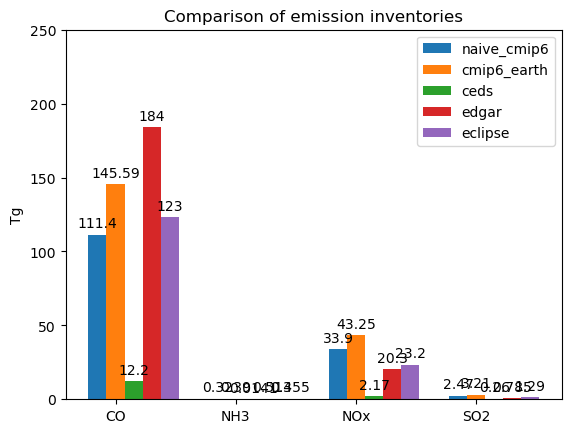

In [6]:
emissions = {

    # Naive approximation, without weighting
    'naive_cmip6': cmip6_naive,

    # Integrating over Earth, year
    'cmip6_earth' : cmip6_earth,

    'ceds': ceds,
    'edgar': edgar,
    'eclipse': eclipse
}

width = 0.15  # the width of the bars
multiplier = 0

fig, ax = plt.subplots()

for attribute, measurement in emissions.items():
    offset = width * multiplier
    rects = ax.bar(X_axis_species + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Tg')
ax.set_title('Comparison of emission inventories')
ax.set_xticks(X_axis_species + width, species)
ax.legend(loc='upper right')
ax.set_ylim(0, 250)

plt.show()

In [7]:
CO = [ceds[0], edgar[0], eclipse[0], cmip6_naive[0], cmip6_earth[0]]
NH3 = [ceds[1], edgar[1], eclipse[1], cmip6_naive[1], cmip6_earth[1]]
NOx = [ceds[2], edgar[2], eclipse[2], cmip6_naive[2], cmip6_earth[2]]
SO2 = [ceds[3], edgar[3], eclipse[3], cmip6_naive[3], cmip6_earth[3]]

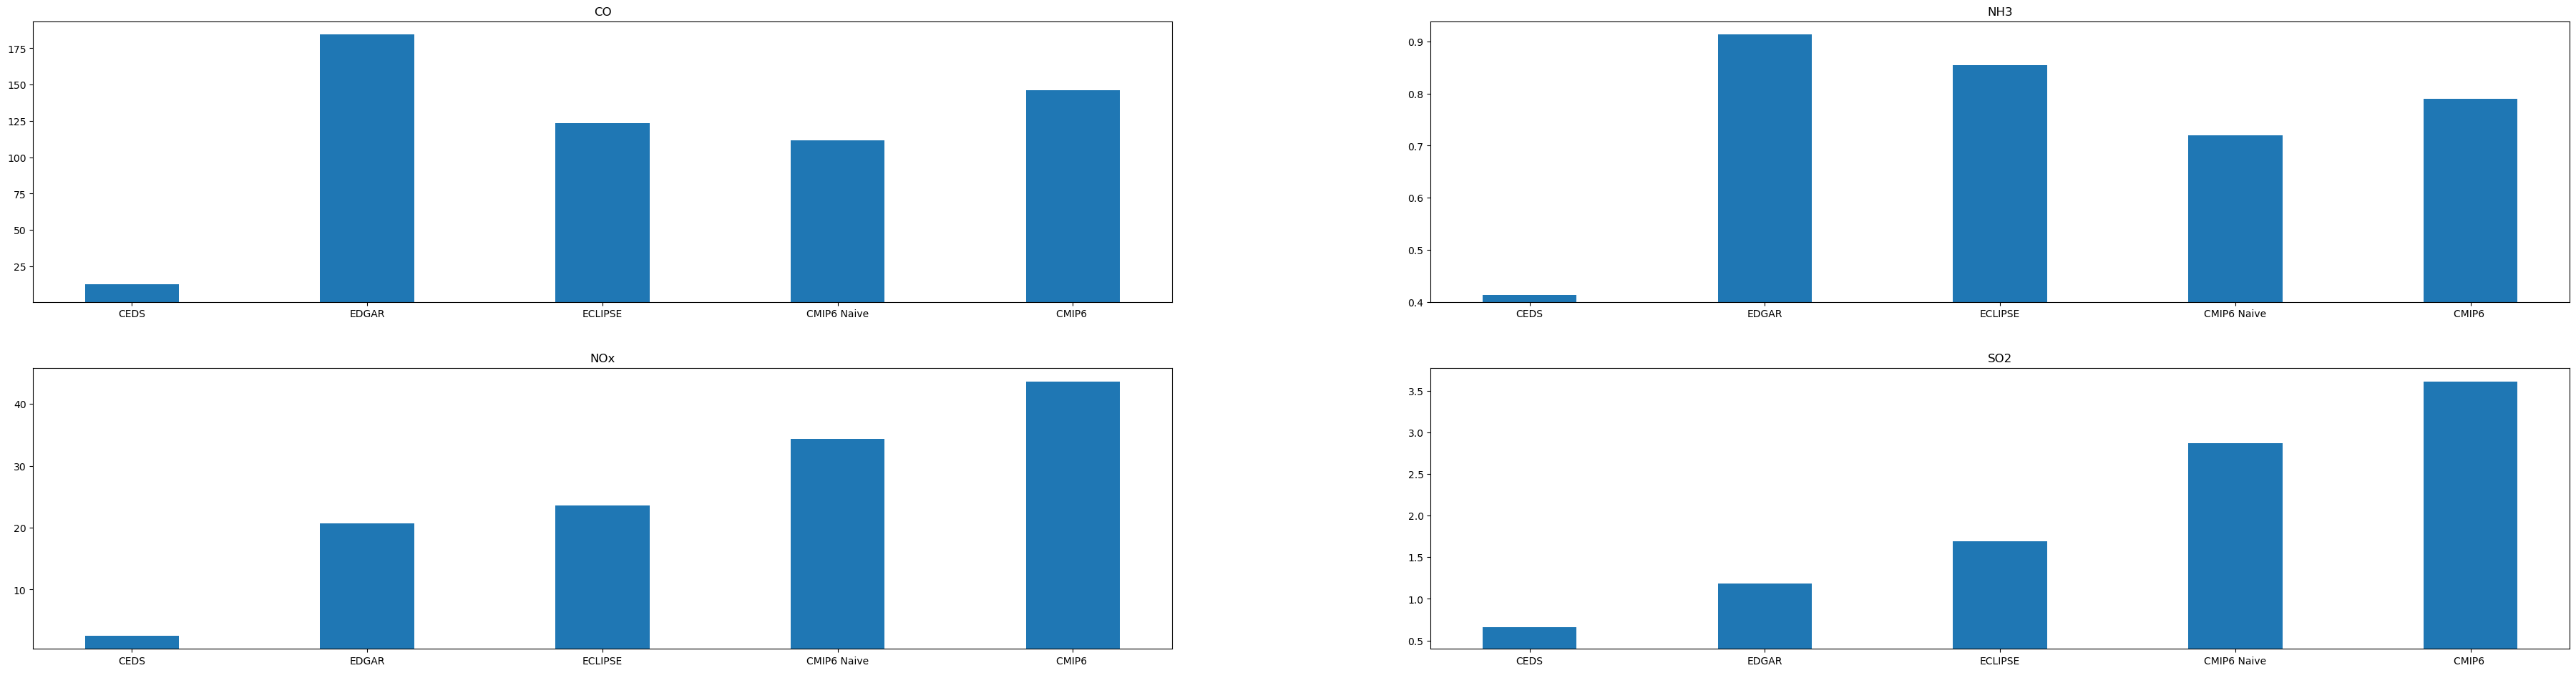

In [8]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.tight_layout()
    
fig.set_figwidth(40)
fig.set_figheight(10)
    
inventories = ['CEDS','EDGAR','ECLIPSE', 'CMIP6 Naive', 'CMIP6 ']

X_axis_invent = np.arange(len(inventories))

ax1.set_title('CO')
ax1.bar(X_axis_invent , CO, width_big, 0.4)
ax1.set_xticks(X_axis_invent, inventories)

ax2.set_title('NH3')
ax2.bar(X_axis_invent , NH3, width_big, 0.4)
ax2.set_xticks(X_axis_invent, inventories)

ax3.set_title('NOx')
ax3.bar(X_axis_invent , NOx, width_big, 0.4)
ax3.set_xticks(X_axis_invent, inventories)

ax4.set_title('SO2')
ax4.bar(X_axis_invent , SO2, width_big, 0.4)
ax4.set_xticks(X_axis_invent, inventories)

In [ ]:
The value of NOx might be different due to different molar masses being used in the calculations: 

In [14]:
NO2_molar_mass = 46.006 #g/mol
NO_molar_mass =  30.006 #g/mol

In [15]:
NOx = cmip6_earth[2]

It can either be corrected to:

In [16]:
NOx_NO = NOx/NO2_molar_mass*NO_molar_mass
NOx_NO

28.208483676042253